In [1]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.rdDistGeom import ETKDGv3, EmbedMolecule
from rdkit.Chem.rdForceFieldHelpers import MMFFOptimizeMolecule
import pandas as pd
import time
import timeout_decorator
from timeout_decorator import timeout, TimeoutError

original_dataset = pd.read_csv("test3-1.csv")

# 提取并添加分子框架
PandasTools.AddMoleculeColumnToFrame(frame=original_dataset, smilesCol='smiles')

# 删除那些无法读取的分子
original_dataset['MOL'] = original_dataset.ROMol.map(lambda x: False if x == None else True)
del_index = original_dataset[original_dataset.MOL == False].index
edited_dataset = original_dataset.drop(del_index)

# 数据的编辑
last_data_ID = 0
drop_list = list(range(0, last_data_ID))
calc_datasets = edited_dataset.drop(drop_list)

# 数据数量的获取
data_num = len(calc_datasets.index)
print('样本数为 {}'.format(data_num))
mols=[]
for i, (ID, smile) in enumerate(zip(calc_datasets['id'], calc_datasets['smiles'])):
    # 从smiles制作三维结构→粗糙的结构优化
    mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
    mol = Chem.AddHs(mol)  # 添加H元素
    
    params = ETKDGv3()
    params.randomseed = 1
    EmbedMolecule(mol, params)  # 扩展到三维
#     mol=Chem.RemoveHs(mol)
    # 通过MMFF（Merck Molecular Force Field，默克分子力场）优化结构
    MMFFOptimizeMolecule(mol)
    
    path = "data"+"/"+"test3"+"/"+str(ID)+".mol"
    Chem.MolToMolFile(mol, path)
    mols.append(mol)

样本数为 2


In [31]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.rdDistGeom import ETKDGv3, EmbedMolecule
from rdkit.Chem.rdForceFieldHelpers import MMFFOptimizeMolecule
import pandas as pd
import time
import timeout_decorator
from timeout_decorator import timeout, TimeoutError

In [16]:
smi =  'COc1ccc(C2=NNC(c3ccc(OCC(=O)O)cc3)C2)cc1'
mol = Chem.MolFromSmiles(smi)
can_smiles=Chem.MolToSmiles(mol)
can_smiles

'COc1ccc(C2=NNC(c3ccc(OCC(=O)O)cc3)C2)cc1'

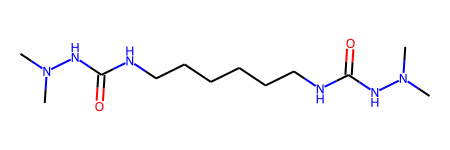

In [32]:
smile = "CN(C)NC(=O)NCCCCCCNC(=O)NN(C)C"
mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
mol
# print(mol)
# mol = Chem.AddHs(mol)  # 添加H元素
# # print(mol)
# params = ETKDGv3()
# params.randomseed = 1
# EmbedMolecule(mol, params)  # 扩展到三维
# # mol

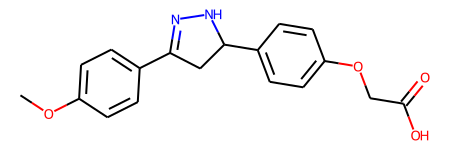

In [30]:
smile = "COc1ccc(C2=NNC(c3ccc(OCC(=O)O)cc3)C2)cc1"
mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
mol

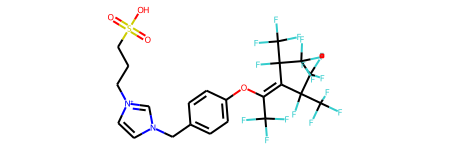

In [25]:
smile = "O=S(=O)(O)CCC[n+]1ccn(Cc2ccc(OC(=C(C(F)(C(F)(F)F)C(F)(F)F)C(F)(C(F)(F)F)C(F)(F)F)C(F)(F)F)cc2)c1"
mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
mol

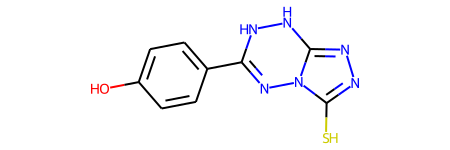

In [26]:
smile = "Oc1ccc(C2=Nn3c(S)nnc3NN2)cc1"
mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
mol

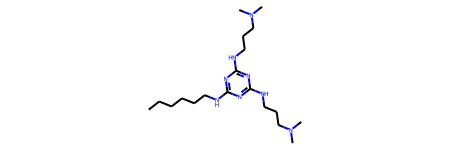

In [6]:
smile = "CCCCCCNc1nc(NCCCN(C)C)nc(NCCCN(C)C)n1"
mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
mol

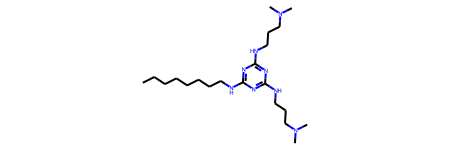

In [7]:
smile = "CCCCCCCCNc1nc(NCCCN(C)C)nc(NCCCN(C)C)n1"
mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
mol

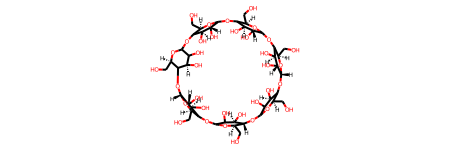

In [8]:
smile = "OC[C@H]1OC2OC3[C@@H](CO)OC(OC4[C@@H](CO)OC(OC5[C@@H](CO)O[C@H](OC6[C@@H](CO)OC(O[C@@H]7[C@@H](CO)OC(OC8[C@@H](CO)O[C@H](OC1[C@H](O)C2O)[C@H](O)[C@H]8O)C(O)[C@H]7O)C(O)[C@H]6O)[C@H](O)[C@H]5O)[C@H](O)[C@H]4O)[C@H](O)[C@H]3O"
mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
mol

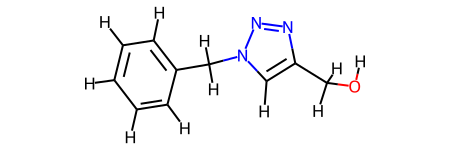

In [12]:
mol = Chem.AddHs(mol)  # 添加H元素
# print(mol)
params = ETKDGv3()
params.randomseed = 1
EmbedMolecule(mol, params)  # 扩展到三维
mol

In [1]:
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem.rdDistGeom import ETKDGv3, EmbedMolecule
from rdkit.Chem.rdForceFieldHelpers import MMFFOptimizeMolecule
import pandas as pd
import time
import timeout_decorator

In [2]:
smi =  'O=C1CCCC2C3CCCN4CCCC(CN12)C43'
mol = Chem.MolFromSmiles(smi)
smile=Chem.MolToSmiles(mol)
smile

'O=C1CCCC2C3CCCN4CCCC(CN12)C34'

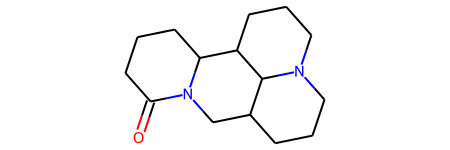

In [3]:
# smile = "NC1SC=C(C2=CC=CC=C2)N=1"
mol = Chem.MolFromSmiles(smile)  # Mol对象的生成
mol

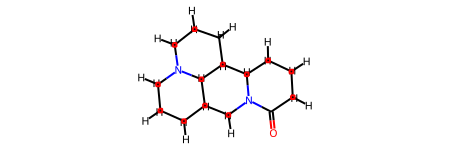

In [4]:
mol = Chem.AddHs(mol)  # 添加H元素
# print(mol)
params = ETKDGv3()
params.randomseed = 1
EmbedMolecule(mol, params)  # 扩展到三维
# 通过MMFF（Merck Molecular Force Field，默克分子力场）优化结构
MMFFOptimizeMolecule(mol)
path = "data"+"/"+"test3"+"/"+"31.mol"
Chem.MolToMolFile(mol, path)
mol

In [9]:
smart = "Fe"
mol = Chem.MolFromSmarts(smart)  # Mol对象的生成
mol

In [30]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

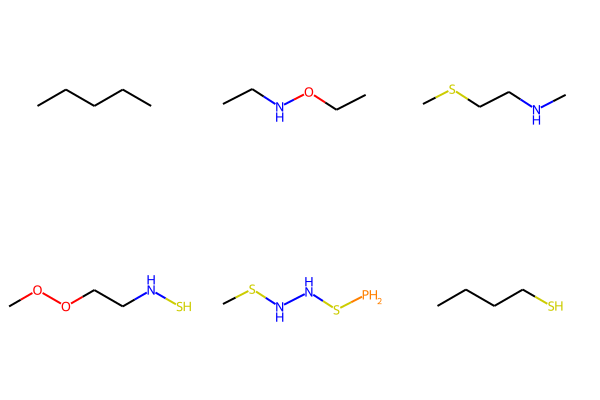

In [31]:
smiles_list= ['CCCCC', 'CCNOCC', 'CSCCNC', 'COOCCNS', 'CSNNSP', 'CCCCS']
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]
MolsToGridImage(mol_list)

[(0, 1, 2), (), (0, 1, 2), (), (), (0, 1, 2)]


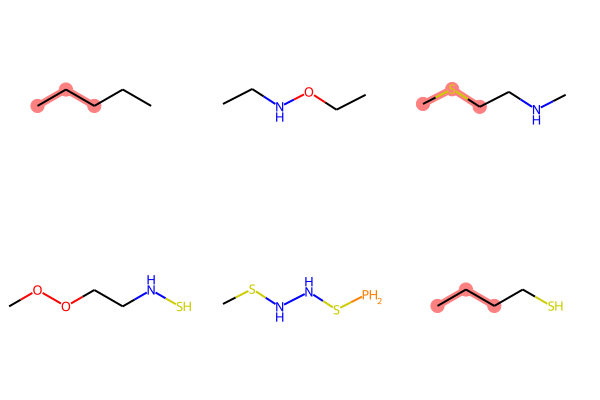

In [32]:
query = Chem.MolFromSmarts('C*C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
print(match_list)
MolsToGridImage(mols=mol_list, highlightAtomLists=match_list, molsPerRow=3)

[(), (), (), (), (), ()]


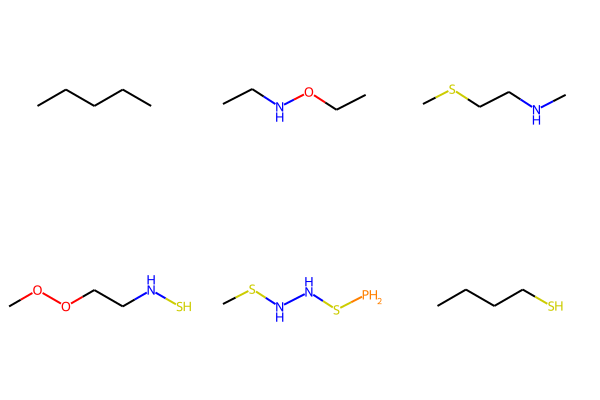

In [34]:
query = Chem.MolFromSmiles('C*C')
match_list = [mol.GetSubstructMatch(query) for mol in mol_list]
print(match_list)
MolsToGridImage(mols=mol_list, highlightAtomLists=match_list, molsPerRow=3)